In [1]:
%matplotlib inline
save_directory = '../../../thesis/kid/'
save = True

In [2]:
from scipy.constants import h, k as k_B, pi
from scipy.special import i0, k0

In [3]:
BCS = 1.76
T_c = 1.2  # K
E_c = k_B * T_c
Delta_Al = BCS * E_c
T_bath = 0.120  # K
E_bath = k_B * T_bath
f_mc = 2.5e9
E_mc = h * f_mc
f_low = 100e6
E_low = h * f_low

In [4]:
def dos(energy, Delta, sigma_n=1, Delta2=0, Gamma=0):
    E = energy - 1j * Gamma
    D = Delta - 1j * Delta2
    return np.real(E * (E**2 - D**2)**(-1/2))

# The 'reversed' density of states that enters K_sigma_2
def dos_r(energy, Delta, sigma_n=1, Delta2=0, Gamma=0):
    E = energy - 1j * Gamma
    D = Delta - 1j * Delta2
    return np.real(E * (D**2 - E**2)**(-1/2))
    
def K_sigma_1(energy, Delta, Delta2=0, Gamma=0):
    rho = dos(energy=energy, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_plus = dos(energy=energy + hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_minus = dos(energy=energy - hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    c_plus = 1 + Delta**2 / (energy * (energy + hf))
    c_minus = 1 + Delta**2 / ((energy - hf) * energy)
    return (2 * sigma_n / hf) * rho * (c_plus * rho_plus - c_minus * rho_minus)

def K_sigma_2(energy, Delta, Delta2=0, Gamma=0):
    rho = dos(energy=energy, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_r = dos_r(energy=energy - hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    c_minus = 1 + Delta**2 / ((energy - hf) * energy)
    return (-2 * sigma_n / hf) * rho * (pi * Delta / energy + c_minus * rho_r)

def kappa_sigma_1(energy, Delta, Delta2=0, Gamma=0):
    rho = dos(energy=energy, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_plus = dos(energy=energy + hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_minus = dos(energy=energy - hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    c_plus = 1 + Delta**2 / (energy * (energy + hf))
    c_minus = 1 + Delta**2 / ((energy - hf) * energy)
    return (2 * sigma_n / hf) * (c_plus * rho_plus - c_minus * rho_minus)

def kappa_sigma_2(energy, Delta, Delta2=0, Gamma=0):
    rho = dos(energy=energy, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    rho_r = dos_r(energy=energy - hf, Delta=Delta, Delta2=Delta2, Gamma=Gamma)
    c_minus = 1 + Delta**2 / ((energy - hf) * energy)
    return (-2 * sigma_n / hf) * (pi * Delta / energy + c_minus * rho_r)

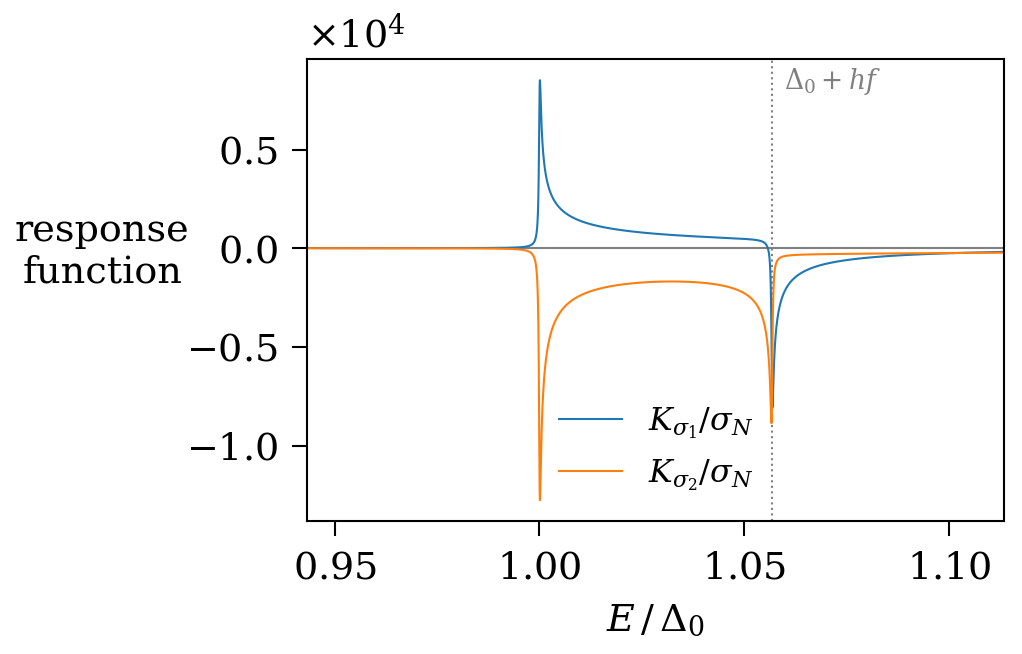

In [5]:
# Normalize to the normal conductivity
sigma_n = 1

# Define energies in units of the gap 
Delta_K = 1
hf = Delta_K * E_mc / Delta_Al
energy = Delta_K * np.linspace(Delta_K - 1 * hf, Delta_K + 2 * hf, 10000)
Delta2 = Delta_K * 0.0002
Gamma = Delta_K * 0

K1 = K_sigma_1(energy=energy, Delta=Delta_K, Delta2=Delta2, Gamma=Gamma)
K2 = K_sigma_2(energy=energy, Delta=Delta_K, Delta2=Delta2, Gamma=Gamma)

fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.text(Delta_K + 1.05 * hf, 0.95 * K1.max(), r'$\Delta_0 + hf$', fontsize='xx-small', color='gray')

ax.axvline(Delta_K + hf, color='gray', linestyle=':')
ax.plot(energy,
        K1,
        label=r'$K_{\sigma_1} / \sigma_N$')
ax.plot(energy,
        K2,
        label=r'$K_{\sigma_2} / \sigma_N$')
ax.set_xlabel(r'$E \, / \, \Delta_0$')
ax.set_ylabel('response\nfunction', rotation='horizontal', labelpad=20)
ax.legend(fontsize='x-small')
ax.set_xlim(energy.min(), energy.max());

if save:
    fig.savefig(save_directory + 'responseqpoccupancy_conductivity_re_and_im.pdf')

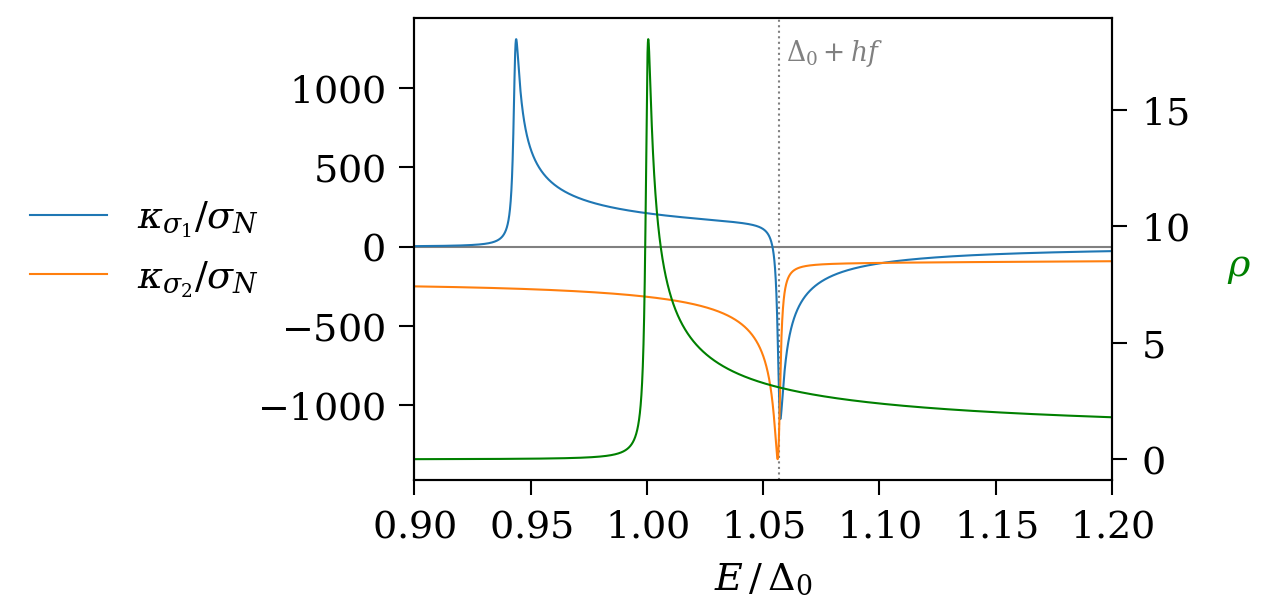

In [6]:
# Normalize to the normal conductivity
sigma_n = 1

# Define energies in units of the gap 
Delta_K = 1
energy = Delta_K * np.linspace(0.9, 1.2, 10000)
hf = Delta_K * E_mc / Delta_Al
Delta2 = Delta_K * 0.001
Gamma = Delta_K * 0

rho = dos(energy=energy, Delta=Delta_K, Delta2=Delta2, Gamma=Gamma)
rho_color = 'green'

fig, kappa_ax = plt.subplots()
dos_ax = kappa_ax.twinx()
kappa_ax.axhline(0, color='gray')
kappa_ax.axvline(Delta_K + hf, color='gray', linestyle=':')
dos_ax.text(Delta_K + 1.05 * hf, 0.95 * rho.max(), r'$\Delta_0 + hf$', fontsize='xx-small', color='gray')
kappa_ax.plot(energy,
              kappa_sigma_1(energy=energy, Delta=Delta_K, Delta2=Delta2, Gamma=Gamma),
              label=r'$\kappa_{\sigma_1} / \sigma_N$')
kappa_ax.plot(energy,
              kappa_sigma_2(energy=energy, Delta=Delta_K, Delta2=Delta2, Gamma=Gamma),
              label=r'$\kappa_{\sigma_2} / \sigma_N$')
dos_ax.plot(energy,
            rho,
            label=r'$\rho$', color=rho_color)
kappa_ax.set_xlabel(r'$E \, / \, \Delta_0$')
#kappa_ax.set_ylabel('reduced\nresponse\nfunction', rotation='horizontal', labelpad=12)
dos_ax.set_ylabel(r'$\rho$', color=rho_color, rotation='horizontal', labelpad=12)
kappa_ax.legend(loc='center left', bbox_to_anchor=(-0.6, 0.5))#, fontsize='x-small')
#dos_ax.legend(fontsize='xx-small')
kappa_ax.set_xlim(energy.min(), energy.max());

In [7]:
((2 * Delta_Al) / (pi * E_bath))**(1/2)

3.347313548753602

In [8]:
E_low / (2 * E_bath)

0.019996852759213958

In [9]:
E_mc / (2 * E_bath)

0.49992131898034897

In [10]:
np.exp(-E_low / (2 * E_bath)) * i0(E_low / (2 * E_bath))

0.98029975001078384

In [11]:
np.exp(-E_mc / (2 * E_bath)) * i0(E_mc / (2 * E_bath))

0.64507371719024864

# Approximations in the integrals

In [12]:
def denominator(z, D):
    return (2 * D * (z - 1) + (z - 1)**2)**(1/2) * (2 * D * (z + 1) + (z + 1)**2)**(1/2)

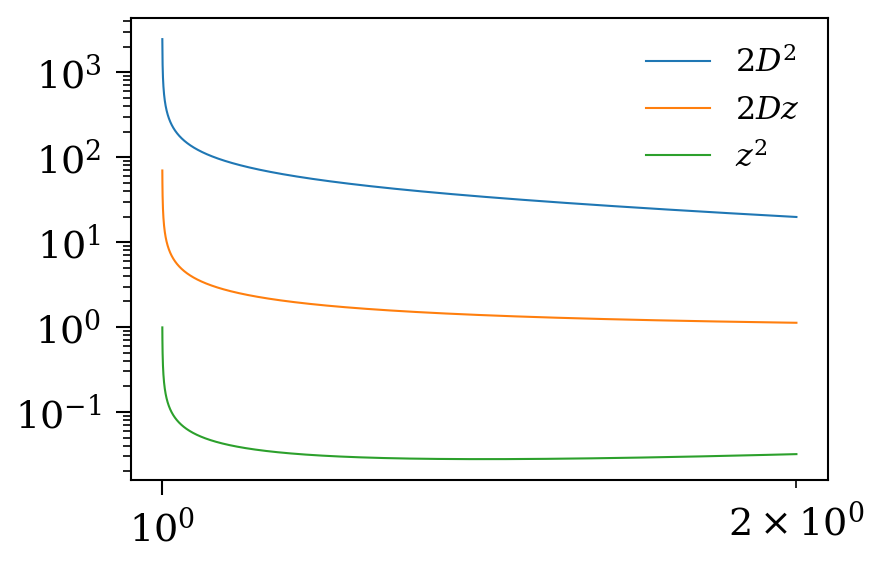

In [13]:
z = np.linspace(1.0001, 2, 10000)
D_low = 2 * Delta_Al / E_low
D_mc = 2 * Delta_Al / E_mc
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(z, 2 * D_mc**2 / denominator(z, D_mc), label='$2 D^2$')
ax.plot(z, 2 * D_mc * z / denominator(z, D_mc), label='$2 D z$')
ax.plot(z, z**2 / denominator(z, D_mc), label='$z^2$')
ax.legend(fontsize='x-small');

# Relative size of terms in $K_{\sigma_2}$

In [14]:
k0(Delta_Al / E_bath)

6.7409188460599522e-09

In [15]:
np.exp(-Delta_Al / E_bath) * np.exp(-E_low / (2 * E_bath)) * i0(E_low / (2 * E_bath))

2.2272861187292139e-08

In [16]:
np.exp(-Delta_Al / E_bath) * np.exp(-E_mc / (2 * E_bath)) * i0(E_mc / (2 * E_bath))

1.4656371541858398e-08